<a href="https://colab.research.google.com/github/AhmadIbrahim07/AhmadIbrahim07/blob/main/Mall_Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
inertia = []
K= range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

In [13]:
#Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)   # tune eps!
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 3    88
-1    35
 4    30
 5    14
 0    12
 6     9
 2     7
 1     5
Name: count, dtype: int64


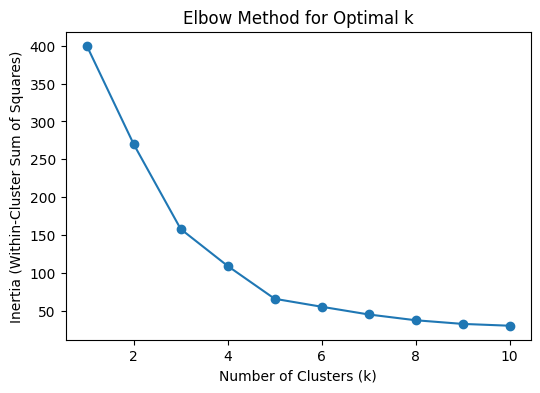

In [9]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

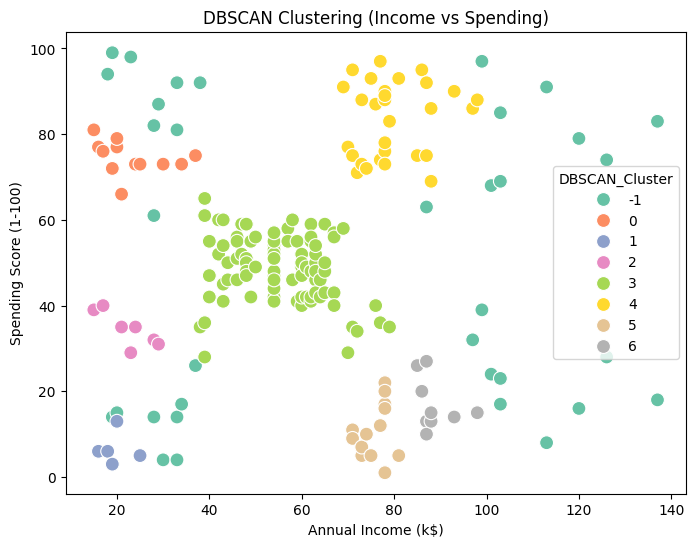

In [14]:
#DBSCAN Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='Set2',
    data=df,
    s=100
)
plt.title("DBSCAN Clustering (Income vs Spending)")
plt.show()

In [10]:
# Let’s assume k=5 from elbow method
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

ValueError: Length of values (5) does not match length of index (1)

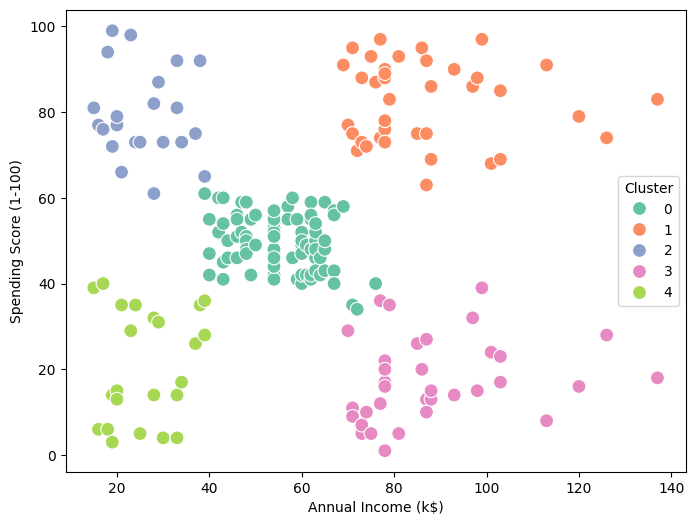

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='Set2',
                data=df,
                s=100)

plt.scatter(kmeans.cluster_centers_[:,0] * X[['Annual Income (k$)']].std() + X[['Annual Income (k$)']].mean(),
            kmeans.cluster_centers_[:,1] * X[['Spending Score (1-100)']].std() + X[['Spending Score (1-100)']].mean(),
            s=200, c='black', marker='X', label='Centroids')

plt.title("Customer Segments")
plt.legend()
plt.show()

In [15]:
# Average spending per KMeans cluster
kmeans_avg = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending per KMeans Cluster:\n", kmeans_avg)

Average Spending per KMeans Cluster:
 Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


In [16]:
# Average spending per DBSCAN cluster
dbscan_avg = df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print("\nAverage Spending per DBSCAN Cluster:\n", dbscan_avg)


Average Spending per DBSCAN Cluster:
 DBSCAN_Cluster
-1    51.657143
 0    74.583333
 1     6.600000
 2    34.428571
 3    48.579545
 4    83.133333
 5    10.071429
 6    17.000000
Name: Spending Score (1-100), dtype: float64


In [17]:
# Interpretation

# K-Means clusters usually show clear income/spending groups (e.g., high spenders vs low spenders).

# DBSCAN clusters may find denser groups and leave outliers (-1).

# Comparing average spending across clusters helps you profile customers:

# “Cluster 0: High income + high spending = premium customers”

# “Cluster 2: Low income + low spending = budget customers”

# etc.